## Exploring KNN

The dataset contains 85 features that measure demographic characteristics for 5822 individuals that were looking at buying a caravan. We try to predict whether a purchase was made Yes|No. It is an imbalanced dataset with around 6% of people making a purchase.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
df = pd.read_csv('Caravan.csv', index_col=0)
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [3]:
df.shape

(5822, 86)

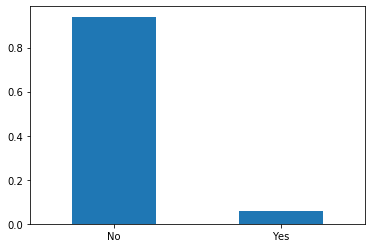

In [4]:
(df['Purchase'].value_counts() / len(df)).plot(kind='bar', rot=0)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 

In [7]:
X, y = df.drop(labels=['Purchase'], axis=1), df['Purchase']

## How does KNN work?

K-nearest neighbors predicts the class of a given test observation by identifying observations that are nearest to it, and then assigning the label of the majority class for those observations. 

Because 'nearness' is a deciding factor in which class is assigned, the scale of the variables matters. Features with a large scale will have a much higher impact on the distance between observations compared to features with a smaller scale. Imagine a case of two features, salary and age. Salaries are far higher in scale than ages can be. "nearness" or "similarity" is calculated using distance measures such as Euclidean distance[https://en.wikipedia.org/wiki/Euclidean_distance] - The high magnitude of salary in effect gives it more importance in the calculation, and thus age will not really be considered as a driving factor (as it contributes unequally in the distance measure).

To fix this, we should scale our data. We can use the standard scaler in sklearn which scales all features are given a mean of zero and unit variance. All features will then be comparable on scale. 

In [33]:
salary = [np.random.randint(low=1, high=10) * 10000 for x in range(20)]
ages = [np.random.randint(low=20, high=30) for x in range(20)]
classes = np.where(np.array(salary)<50000, 1, 0)

(0, 50)

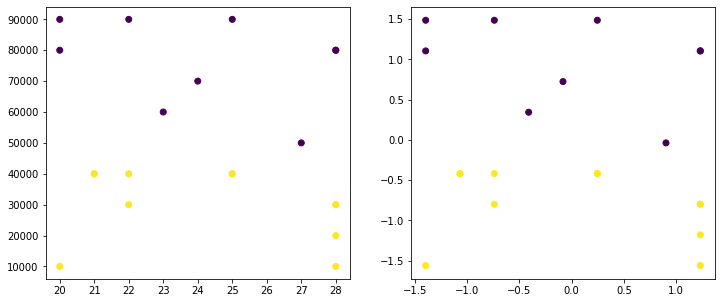

In [48]:
scaler = StandardScaler()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(ages, salary, c=classes)
ax2.scatter(scaler.fit_transform(np.array(ages).reshape(-1, 1)).reshape(1, -1)[0].tolist(), scaler.fit_transform(np.array(salary).reshape(-1, 1)).reshape(1, -1)[0].tolist(), c=classes)
ax.set_xlim(0, 50)

In the left plot, matplotlib autoscales the axis so it is somewhat misleading. But check the X,Y axes on both plots. We maintain the pattern of our data, but the difference in scales are now the same in the right plot, where on the left plot they are much different.

## Fitting KNN to our data

In [57]:
scaler= StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns.tolist())
display(X_scaled.head())

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816


In [58]:
# Transform y
y = np.where(y=='Yes', 1, 0)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, classification_report, plot_roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1.0/5)

In [156]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [157]:
print(confusion_matrix(y_test, preds))

[[1086    7]
 [  69    3]]


We have an imbalanced dataset, where the majority of individuals do not make a purchase. Accuracy does not really tell us anything in this case, as we can get a fairly accurate classifier by predicting NO to everything.  

In [158]:
accuracy_score(y_test, [0 for i in range(len(y_test))])

0.9381974248927039

Instead, we should be interested in the following: Of the 66 customers that did make a purchase, how many of those did our model capture? For this we can use what is called "recall".

Imagine a sales person that tries to sell a caravan to a random person -> we can calculate his success rate using our existing dataset, which puts him at 6% (6% of customers made a purchase).

There are of course costs involved with making a sale, so the company doesn't really want the sales person targeting everybody in order to make a sale. In reality he should target customers that are likely to purchase. Given we had a model that could do that (i.e this model) what would his success rate be now?

In [161]:
print(recall_score(y_test, preds))
print()
print(3 / (69 + 3))

0.041666666666666664

0.041666666666666664


Really we should cross-validate that score -> we could just have gotten favourable data on our train/test splits. This is the default model used above.

In [160]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_scaled, y, cv=3, scoring='recall'))

0.022988505747126436

Ok, so this model configuration actually performs worse -> so lets see if we can improve that.

In [128]:
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
recall = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    recall_scores = []
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall_scores.append(recall_score(y_test, preds))
    
    recall.append(np.mean(recall_scores))

we can achieve the same using cross_val_score

In [135]:
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
recall = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    recall.append(np.mean(cross_val_score(knn, X_scaled, y, cv=3, scoring='recall', n_jobs=-1)))

Text(0.5, 0, 'K')

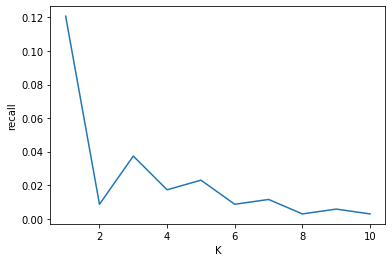

In [136]:
fig, ax = plt.subplots(1, 1)
ax.plot(n, recall)
ax.set_ylabel('recall')
ax.set_xlabel('K')

So it appears that 1 is the optimal neighbor.

In [152]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), X_scaled, y, cv=3, scoring='recall', n_jobs=-1)

array([0.12931034, 0.14655172, 0.0862069 ])

In [162]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [164]:
confusion_matrix(y_test, preds)

array([[1032,   61],
       [  62,   10]], dtype=int64)

In [166]:
recall_score(y_test, preds)

0.1388888888888889